# **Neural network regression with tensorflow**

In [1]:
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
import tensorflow as tf

2024-07-07 13:40:42.259252: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-07 13:40:42.266729: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-07 13:40:42.276153: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-07 13:40:42.276168: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-07 13:40:42.283458: I tensorflow/core/platform/cpu_feature_gua

In [3]:
print(tf.__version__)

2.16.2


In [4]:
import numpy as np
import matplotlib.pyplot as plt

## **Generating datasets**

In [5]:
# Create features
X = np.arange(start = -7, stop = 15, step = 3, dtype = 'float32')

In [6]:
X

array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)

In [7]:
# Create labels
y = np.arange(start = 3, stop = 25, step = 3, dtype = 'float32')

In [8]:
y

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)

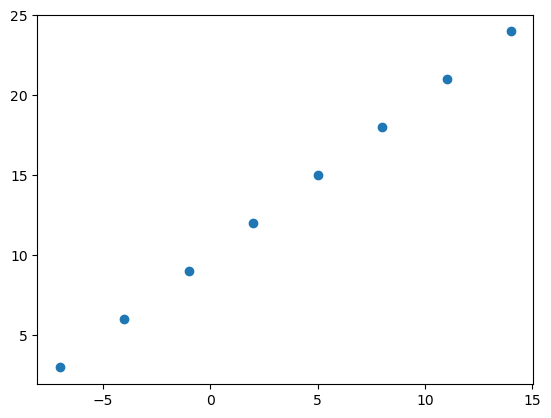

In [9]:
plt.scatter(X, y)
plt.show()

In [10]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [11]:
X = tf.constant(X)

2024-07-07 13:40:43.521374: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-07 13:40:43.536026: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-07 13:40:43.536082: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-07 13:40:43.538011: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-07 13:40:43.538044: I external/local_xla/xla/stream_executor

In [12]:
y = tf.constant(y)

## **Creating a model**

In [13]:
tf.random.set_seed(42)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    tf.keras.layers.ReLU()
])

In [15]:
model.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['mae']
)

In [16]:
model.fit(tf.expand_dims(X, axis = -1), y, epochs = 5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - loss: 10.0760 - mae: 10.0760
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.9436 - mae: 9.9436
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.8111 - mae: 9.8111
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.6786 - mae: 9.6786
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9.5461 - mae: 9.5461


I0000 00:00:1720352444.221129   22704 service.cc:145] XLA service 0x7fe6340049f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1720352444.221168   22704 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-07-07 13:40:44.228139: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-07 13:40:44.249730: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1720352444.312792   22704 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


In [17]:
y_pred = model.predict(tf.expand_dims([17], axis = -1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [18]:
y_pred

array([[19.65561]], dtype=float32)

## **Improving the model**